In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [ ]:
data_path = "/content/drive/MyDrive/Predictive_Maintenance/ai4i2020.csv"
df_predictive = pd.read_csv(data_path)

# 1. Initial Findings

In [ ]:
print("First 5 rows:")
df_predictive.head()

First 5 rows:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
print("\nDataset Info:")
df_predictive.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float

In [ ]:
print("\nSummary Statistics:")
df_predictive.describe()


Summary Statistics:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
print("\nMissing Values:")
print(df_predictive.isnull().sum())


Missing Values:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [ ]:
# print the count of target variables
df_predictive['Machine failure'].value_counts()

,count
Machine failure,
0,9661
1,339


# Preprocessing

In [ ]:
# Encode categorical variable 'Type'
label_encoder = LabelEncoder()
df_predictive['Type'] = label_encoder.fit_transform(df_predictive['Type'])

# Define target and feature variables
target_column = 'Machine failure'
X = df_predictive.drop(columns=['UDI', 'Product ID', target_column])
y = df_predictive[target_column]

# Standardize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Adjust number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

In [ ]:
y_resampled.value_counts()

,count
Machine failure,
0,9661
1,9661


In [ ]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Model Implementation

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    """
    Prints the classification report and plots the confusion matrix.

    Parameters:
    - y_test: Actual target values
    - y_pred: Predicted target values
    - model_name: Name of the model (string)
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print classification report
    print(f"\nClassification Report - {model_name}:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()  # default n_estimators=100
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xg = classifier_xgb.predict(X_test)


Classification Report - XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2901
           1       0.99      0.99      0.99      2896

    accuracy                           0.99      57

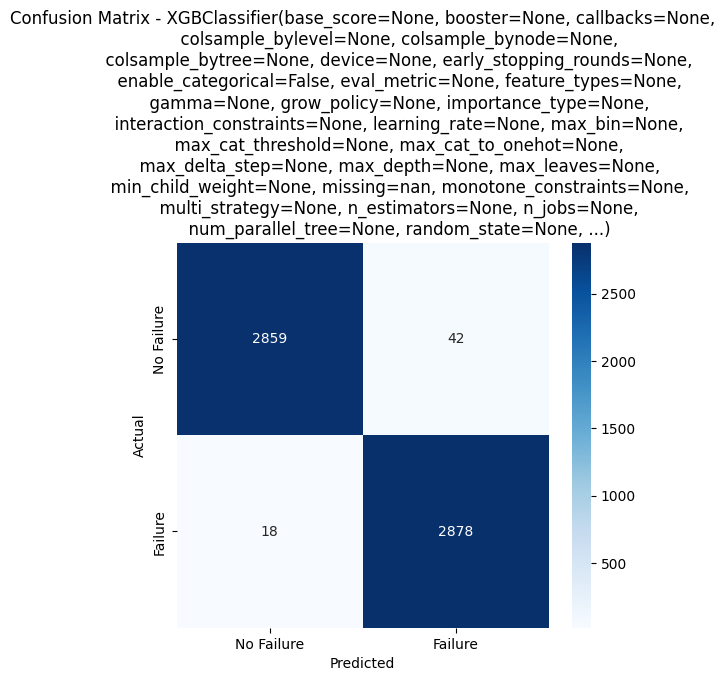

In [ ]:
evaluate_model(y_test, y_pred_xg, classifier_xgb)

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

classifier_cat = CatBoostClassifier(verbose=0)  # suppress training output
classifier_cat.fit(X_train, y_train)

In [ ]:
y_pred_cat = classifier_cat.predict(X_test)


Classification Report - CatBoostClassifier:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2901
           1       0.99      0.99      0.99      2896

    accuracy                           0.99      5797
   macro avg       0.99      0.99      0.99      5797
weighted avg       0.99      0.99      0.99      5797



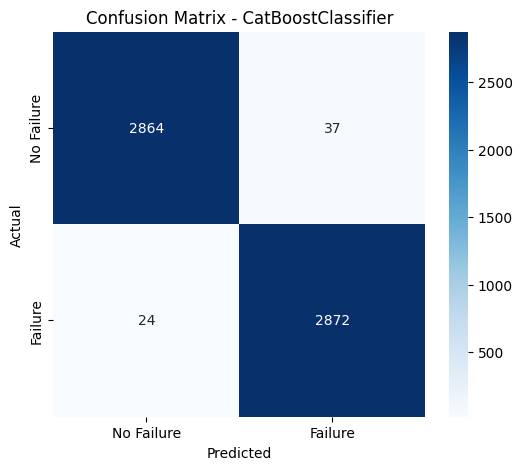

In [ ]:
evaluate_model(y_test, y_pred_cat, 'CatBoostClassifier')